## Load Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the csv file

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring the data set in order to derive useful information

In [5]:
df.shape

(303, 14)

this shows our data has 303 rows and 14 columns

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

we can see the column names here

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statstical Details Describe provides us with statistical information in the numerical format. we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


we notice that the dataset has no null values. this saved us from conveting the null values into some data or dropping then altogether.

## Finding the correlation among the attributes

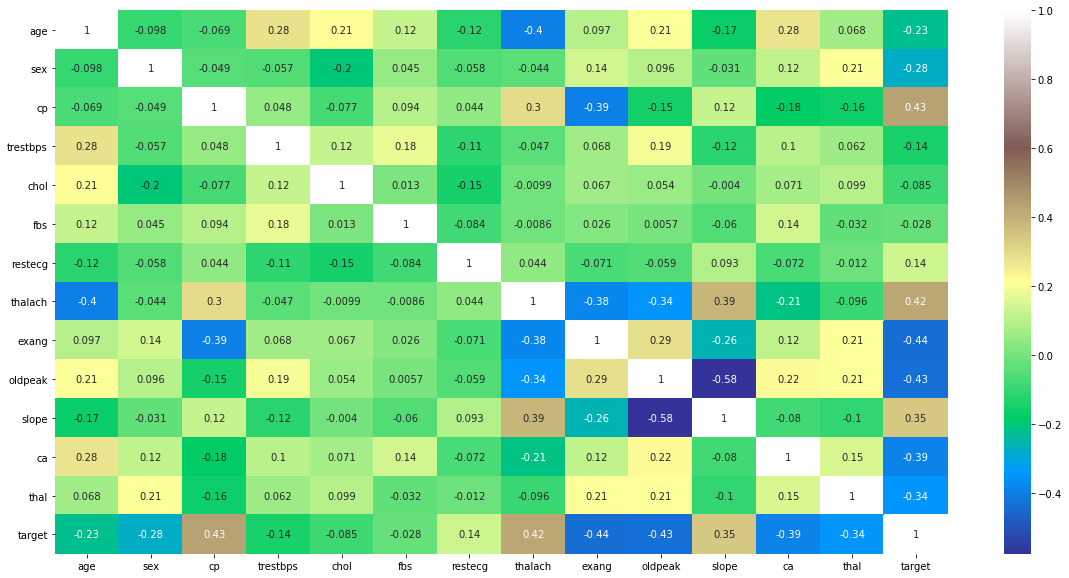

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

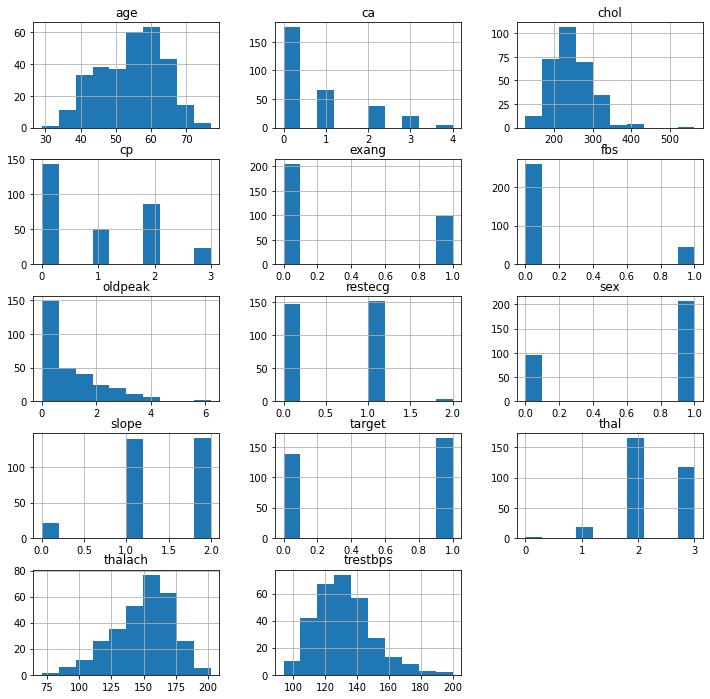

In [12]:
df.hist(figsize=(12,12), layout=(5,3));


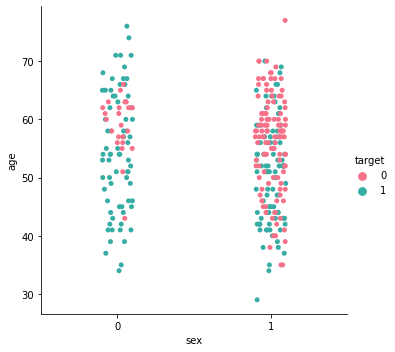

In [13]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

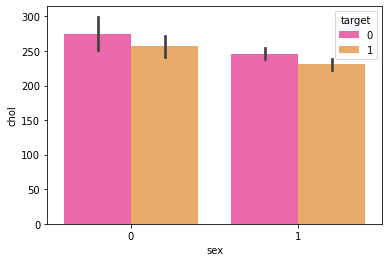

In [14]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

207 males and 96 females

In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

165 cases of heart diseases
and 138 cases of no heart diseases

In [17]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

results of thallium stress test measuring blood flow to the heart,
with possible values normal, fixed_defect, reversible_defect

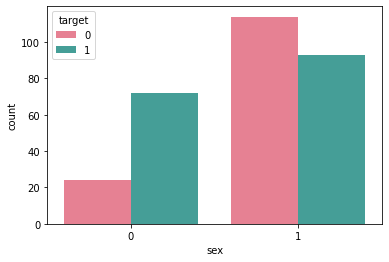

In [18]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

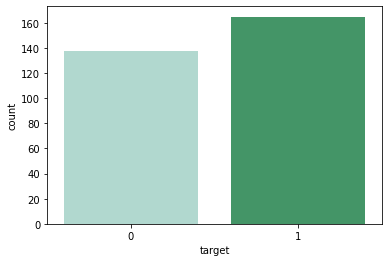

In [19]:
sns.countplot(x='target',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 140 and those having heart disease the count is 160.

In [20]:
df['cp'].value_counts()  # chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

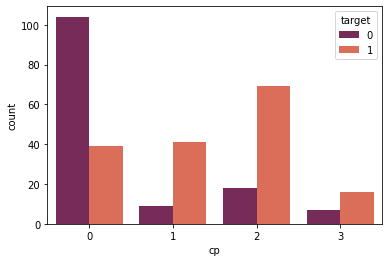

In [21]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

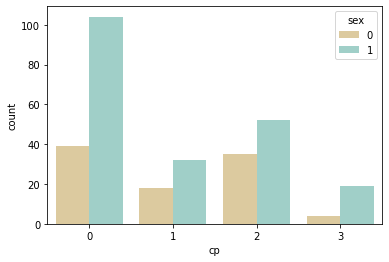

In [22]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

# fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [23]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

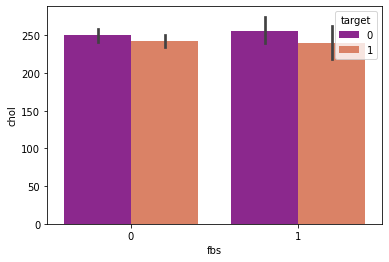

In [24]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

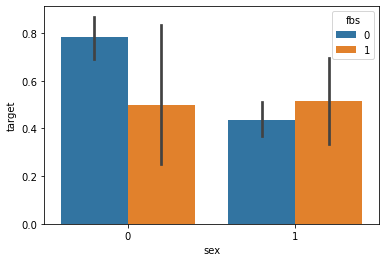

In [25]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

# Cross Tables

In [26]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


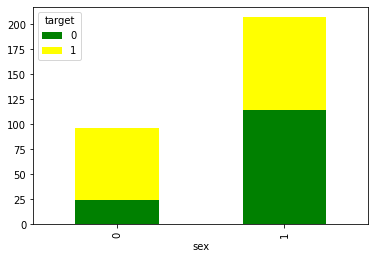

In [27]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [28]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


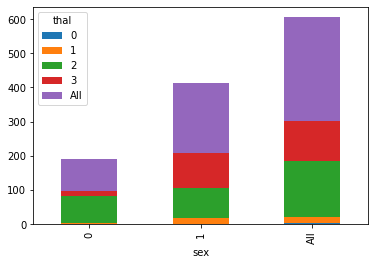

In [29]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [30]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


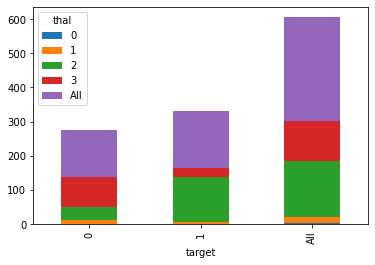

In [31]:
temp.plot(kind='bar', stacked=True)
plt.show()


In [32]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


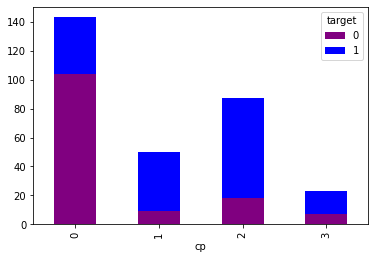

In [33]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

# Preparing the data for Model
Scaling the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [36]:
X= df.drop(['target'], axis=1)
y= df['target']

In [37]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

## Check the sample Size

In [38]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

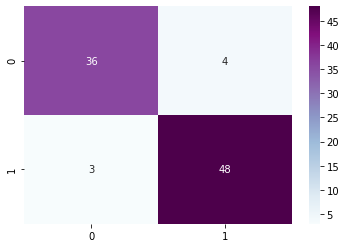

In [41]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [42]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [46]:
cm2

array([[32,  8],
       [11, 40]], dtype=int64)

In [47]:
accuracy_score(y_test,prediction2)

0.7912087912087912

In [48]:
print(classification_report(y_test, prediction2))


              precision    recall  f1-score   support

           0       0.74      0.80      0.77        40
           1       0.83      0.78      0.81        51

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [50]:
accuracy_score(y_test, prediction3)

0.8791208791208791

In [51]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[33,  7],
       [ 2, 49]], dtype=int64)

In [54]:
accuracy_score(y_test, prediction4)

0.9010989010989011

In [55]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [56]:
accuracy_score(y_test, prediction5)

0.8791208791208791

In [57]:
print('cm4', cm4)
print('-----------')
print('cm5',cm5)

cm4 [[33  7]
 [ 2 49]]
-----------
cm5 [[35  5]
 [ 6 45]]


In [58]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[35,  5],
       [ 6, 45]], dtype=int64)

In [59]:
print('KNN :', accuracy_score(y_test, prediction6))
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))

KNN : 0.8351648351648352
lr : 0.9230769230769231
dtc : 0.7912087912087912
rfc : 0.8791208791208791
NB:  0.9010989010989011
SVC : 0.8791208791208791


## Best accuracy is given by Logistic Regression : 92

### followed by NB and Decision tree : 90